## **Import Library**

In [1]:
pip install kagglehub[pandas-datasets]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [3]:
# Set the path to the file you'd like to load
file_path = "anime.csv"

# Load the latest version
anime_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "CooperUnion/anime-recommendations-database",
  file_path)

anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


**Penjelasan:**
Terlihat bahwa dataset dari anime.csv memiliki 12294 baris dan 7 kolom yakni anime_id, name, genre, type, episodes, rating dan members. Ini mengandung makna bahwa dataset pada anime.csv berjumlah 12294.

In [4]:
# Set the path to the file you'd like to load
file_path = "rating.csv"

# Load the latest version
rating_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "CooperUnion/anime-recommendations-database",
  file_path)

rating_df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


**Penjelasan:**
Terlihat bahwa dataset dari rating.csv memiliki 7813737 baris dan 3 kolom yakni user_id, anime_id dan rating. Ini mengandung makna bahwa dataset pada rating.csv berjumlah 7813737.

## **Univariate EDA**

#### **1. anime_df**

In [5]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


**Penjelasan:**
Berdasarkan anime_df.info(), diperoleh bahwa fitur anime_id memiliki jumlah data sebanyak 12294 dengan type datanya adalah int64, name memiliki jumlah data sebanyak 12294 dengan type datanya adalah object, genre memiliki jumlah data sebanyak 12232 dengan type datanya adalah object, type memiliki jumlah data sebanyak 12269 dengan type datanya adalah object, episodes memiliki jumlah data sebanyak 12294 dengan type datanya adalah object, rating memiliki jumlah data sebanyak 12064 dengan type datanya adalah float64 dan members memiliki jumlah data sebanyak 12294 dengan type datanya adalah int64.

In [6]:
anime_df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


**Penjelasan:**
Berdasarkan hasil dari anime_df.describe, diperoleh bahwa nilai rating berada pada rentang 1.67 sampai 10. Ini berarti bahwa nilai maximal rating yang ada adalah 10.

In [7]:
print("Jumlah nama unik di kolom 'type':", anime_df['type'].nunique())
print("Daftar nama unik di kolom 'type':", anime_df['type'].unique())

print("\nJumlah nama unik di kolom 'name':", anime_df['name'].nunique())

Jumlah nama unik di kolom 'type': 6
Daftar nama unik di kolom 'type': ['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]

Jumlah nama unik di kolom 'name': 12292


**Penjelasan:**
Terlihat bahwa nama atau judul anime secara keseluruhan adalah 12292 dan type anime adalah 6 type yakni Movie, TV, OVA, Special, Music, ONA dan ada pula baris yang kosong.

In [8]:
genre_anime = anime_df['genre'].str.split(', ').explode().unique()
print("Total unik genre:", len(genre_anime))
print("Daftar genre yang ada secara keseluruhan:", list(genre_anime))

Total unik genre: 44
Daftar genre yang ada secara keseluruhan: ['Drama', 'Romance', 'School', 'Supernatural', 'Action', 'Adventure', 'Fantasy', 'Magic', 'Military', 'Shounen', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Thriller', 'Sports', 'Super Power', 'Space', 'Slice of Life', 'Mecha', 'Music', 'Mystery', 'Seinen', 'Martial Arts', 'Vampire', 'Shoujo', 'Horror', 'Police', 'Psychological', 'Demons', 'Ecchi', 'Josei', 'Shounen Ai', 'Game', 'Dementia', 'Harem', 'Cars', 'Kids', 'Shoujo Ai', nan, 'Hentai', 'Yaoi', 'Yuri']


**Penjelasan:**
Terlihat bahwa ada 44 kategori genre, kita ketahui pula bahwa satu anime dapat memiliki beberapa genre yang dipisahkan oleh tanda ", " sesuai pada dataframe anime_df.

#### **2. rating_df**

In [9]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [10]:
rating_df.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


**Penjelasan:**
Dari rating_df.info() dan rating_df.describe(), dapat diketahui bahwa rating.csv memiliki 3 fitur yakni user_id dengan type data int64 dan berjumlah 7813737, anime_id dengan type data int64 dan berjumlah 7813737 serta rating dengan type data int64 dan berjumlah 7813737. Pada fitur rating pula, diketahui bahwa rating terkecil dimulai dari -1(rating yang digeneralisasi jika pengguna menonton anime tersebut namun tidak memberikan rating) hingga 10.

## **Data Preparation**

### Pengecekan Missing Value dan Duplikat serta Penanganannya pada Masing-masing Data

#### **1. Pengecekan**

In [11]:
print("Missing value di anime_df:")
print(anime_df.isnull().sum())

print("\nMissing value di rating_df:")
print(rating_df.isnull().sum())

print("\nDuplicate data di anime_df:")
print(anime_df.duplicated().sum())

print("\nDuplicate data di rating_df:")
print(rating_df.duplicated().sum())

Missing value di anime_df:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Missing value di rating_df:
user_id     0
anime_id    0
rating      0
dtype: int64

Duplicate data di anime_df:
0

Duplicate data di rating_df:
1


**Penjelasan:**
Terlihat bahwa anime_df memiliki beberapa missing value dan 0 duplikat data. Terlihat pula bahwa rating_df tidak memiliki missing value dan terdapat 1 duplikat data.

In [12]:
# Identify baris dengan missing values di 'genre', 'type', dan 'rating'
missing_genre = anime_df['genre'].isnull()
missing_type = anime_df['type'].isnull()
missing_rating = anime_df['rating'].isnull()

# Hitung baris dengan missing value di kedua kolom 'genre' dan 'type'
count_genre_type = anime_df[missing_genre & missing_type].shape[0]
print(f"Jumlah baris dengan missing value pada kolom 'genre' dan 'type': {count_genre_type}")

# Hitung baris dengan missing value di kedua kolom 'genre' dan 'rating'
count_genre_rating = anime_df[missing_genre & missing_rating].shape[0]
print(f"Jumlah baris dengan missing value pada kolom 'genre' dan 'rating': {count_genre_rating}")

# Hitung baris dengan missing value di kedua kolom 'type' dan 'rating'
count_type_rating = anime_df[missing_type & missing_rating].shape[0]
print(f"Jumlah baris dengan missing value pada kolom 'type' dan 'rating': {count_type_rating}")

# Hitung baris dengan missing value di ketiga kolom 'genre', 'type', dan 'rating'
count_all_three = anime_df[missing_genre & missing_type & missing_rating].shape[0]
print(f"Jumlah baris dengan missing value pada kolom 'genre', 'type', dan 'rating': {count_all_three}")

Jumlah baris dengan missing value pada kolom 'genre' dan 'type': 3
Jumlah baris dengan missing value pada kolom 'genre' dan 'rating': 15
Jumlah baris dengan missing value pada kolom 'type' dan 'rating': 25
Jumlah baris dengan missing value pada kolom 'genre', 'type', dan 'rating': 3


In [13]:
# Menghitung jumlah baris yang memiliki setidaknya satu missing value
rows_with_missing_values = anime_df[anime_df.isnull().any(axis=1)].shape[0]
print(f"\nJumlah baris di anime_df yang memiliki missing value: {rows_with_missing_values}")


Jumlah baris di anime_df yang memiliki missing value: 277


**Penjelasan:**
Terlihat bahwa missing value pada setiap kolom ternyata memiliki beberapa irisan dengan kolom lain. Hal itu terlihat dari pengecekan dimana missing value pada kolom 'genre' dan 'type': 3, missing value pada kolom 'genre' dan 'rating': 15, missing value pada kolom 'type' dan 'rating': 25 dan missing value pada kolom 'genre', 'type', dan 'rating': 3. Berdasarkan jumlah keseluruhan missing value pada setiap kolom yakni rating 230, type 25 dan genre 62, baris-baris yang memiliki missing value hanya berjumlah 277. Baris-baris ini yang nantinya akan dilakukan penanganan.

#### **2. Penanganan**

In [14]:
anime_df.dropna(axis = 0, inplace = True)
print("Missing value di anime_df:")
print(anime_df.isnull().sum())

Missing value di anime_df:
anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


In [15]:
rating_df.drop_duplicates(inplace=True)
print("\nDuplicate data di rating_df:")
print(rating_df.duplicated().sum())


Duplicate data di rating_df:
0


**Penjelasan:**
Setelah dilakukan penanganan, maka missing value dari anime_df dan duplikat dari rating_df sudah 0.

In [16]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [17]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7813736 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 238.5 MB


**Penjelasan:**
Setelah dilakukan penanganan pada anime_df dan rating_df, maka diperoleh jumlah data pada anime_df untuk setiap fiturnya adalah sebanyakn 12017 dan jumlah data pada rating_df untuk setiap fiturnya adalah 7813736.

Pada Univariate EDA sebelumnya, diketahui bahwa jumlah judul anime adalah 12292, sedangkan setelah dilakukan penanganan duplikat dan missing value, jumlah name atau judul anime pada anime_df berjumlah 12017. Hal ini memiliki sedikit keanehan, karena ketika jumlah judul 12292 dan dilakukan penanganan missing value sebanyak 277, maka seharusnya data akhir berjumlah 12015. Ini memiliki arti terdapat indikasi duplikat pada judul. Akan dilihat lebih lanjut untuk judul yang tidak unik.

In [18]:
# Mencari nama anime yang muncul lebih dari satu kali
duplicate_names = anime_df[anime_df.duplicated(subset=['name'], keep=False)]

# Menampilkan seluruh isinya sesuai kolom-kolom di anime_df
print("Data dengan nama anime yang tidak unik:")
duplicate_names

Data dengan nama anime yang tidak unik:


,anime_id,name,genre,type,episodes,rating,members
10140,22399,Saru Kani Gassen,Kids,OVA,1,5.23,62
10141,30059,Saru Kani Gassen,Drama,Movie,1,4.75,76
10193,33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12,6.67,114
10194,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110


**Penjelasan:**
Terlihat bahwa name yang sama sebanyak 2 name dengan masing-masing memiliki 1 name yang sama. Namun terlihat pula bahwa type dari anime tersebut berbeda, ini menandakan bahwa jenis berbeda walaupun tetap satu anime yang sama. Jadi dari indikasi sebelumnya dapat disimpulkan bahwa data tidak memiliki keanehan karena walaupun memiliki judul yang sama, namun berbeda jenis.

### Data Preprocessing

Dilakukan penggabungan data berdasarkan kesamaan anime_id dan mengubah nama kolom rating pada rating_df menjadi rating_user.

In [19]:
alldata_df = pd.merge(anime_df, rating_df.rename(columns={'rating': 'rating_user'}), on='anime_id')
alldata_df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


**Penjelasan:**
Data rating_df dan anime_df telah digabungkan berdasarkan anime_id dan disimpan dalam variabel bernama alldata_df.

### Mempersiapkan Data untuk Model Content Based Filtering

#### **1. Pengecekan deskripsi alldata_df**

In [20]:
alldata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813610 entries, 0 to 7813609
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   anime_id     int64  
 1   name         object 
 2   genre        object 
 3   type         object 
 4   episodes     object 
 5   rating       float64
 6   members      int64  
 7   user_id      int64  
 8   rating_user  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 536.5+ MB


In [21]:
alldata_df.describe()

,anime_id,rating,members,user_id,rating_user
count,7.813610e+06,7.813610e+06,7.813610e+06,7.813610e+06,7.813610e+06
mean,8.908728e+03,7.653158e+00,1.786233e+05,3.672799e+04,6.144075e+00
std,8.883598e+03,6.729753e-01,1.881764e+05,2.099793e+04,3.727792e+00
min,1.000000e+00,1.670000e+00,2.900000e+01,1.000000e+00,-1.000000e+00
25%,1.240000e+03,7.270000e+00,4.403000e+04,1.897400e+04,6.000000e+00
50%,6.213000e+03,7.680000e+00,1.104700e+05,3.679100e+04,7.000000e+00
75%,1.409300e+04,8.130000e+00,2.442680e+05,5.475800e+04,9.000000e+00
max,3.451900e+04,9.500000e+00,1.013917e+06,7.351600e+04,1.000000e+01


**Penjelasan:**
Terlihat bahwa jumlah data untuk setiap fitur sama dan pada fitur rating minimalnya adalah 1.67 dan maksimalnya 9.5, namun pada fitur rating_user, minimalnya adalah -1 dan maksimalnya adalah 10 dengan -1 berarti user tersebut tidak memberikan rating untuk anime yang ditonton. Ini bukan suatu permasalahan, karena fitur rating adalah rate untuk judul anime dengan type tertentu secara keseluruhan, sedangkan rating_user adalah rating yang diberikan setiap user untuk anime yang ditonton.

#### **2. Pengecekan missing value dan duplikat pada alldata_df**

In [22]:
print("Missing value di alldata_df:")
print(alldata_df.isnull().sum())

print("\nDuplicate data di alldata_df:")
print(alldata_df.duplicated().sum())

Missing value di alldata_df:
anime_id       0
name           0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
rating_user    0
dtype: int64

Duplicate data di alldata_df:
0


**Penjelasan:**
Terlihat bahwa alldata_df tidak memiliki missing value dan data yang duplikat.

#### **3. Pengecekan jenis genre dari data yang telah digabungkan**

In [23]:
genres = alldata_df['genre'].str.split(', ').explode().unique()
print("Total unik genre:", len(genres))
print("Daftar genre yang ada secara keseluruhan:", list(genres))

Total unik genre: 43
Daftar genre yang ada secara keseluruhan: ['Drama', 'Romance', 'School', 'Supernatural', 'Action', 'Adventure', 'Fantasy', 'Magic', 'Military', 'Shounen', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Thriller', 'Sports', 'Super Power', 'Space', 'Slice of Life', 'Mecha', 'Music', 'Mystery', 'Seinen', 'Martial Arts', 'Vampire', 'Shoujo', 'Horror', 'Police', 'Psychological', 'Demons', 'Ecchi', 'Josei', 'Shounen Ai', 'Game', 'Dementia', 'Harem', 'Cars', 'Kids', 'Shoujo Ai', 'Hentai', 'Yaoi', 'Yuri']


**Penjelasan:**
Terlihat bahwa jenis genre tidak memiliki keanehan dan sudah benar. Perbedaan yang ada hanya jumlah genre pada data yang telah dilakukan penggabungan serta penanganan missing value dan duplikat berjumlah 43, namun jumlah genre di data awal anime_df adalah 44. Ini tidak memiliki indikasi adanaya keanehan, karena setelah dilakukan penanganan, maka beberapa data awal telah dil;akukan penghapusan yang mengakibatkan jumlah genrenya menjadi berkurang 1.

#### **4. Mengambil data dari user dengan minimal nonton 1000 anime dan rating >= 7**

Untuk mendapatkan rekomendasi yang lebih baik, akan lebih baik mengambil data hanya dari user dengan pengetahuan anime cukup mumpuni. Ini dapat dilihat dari seberapa banyak user tersebut menonton dan memberi rating pada anime yang ditonton. Akan diambil user dengan minimal 1000 interaksi yang dimana ini akan memperkuat kemungkinan bahwa user tersebut sudah menonton banyak jenis anime dari berbagai genre. Hal ini dilakukan karena dimisalkan jika hanya mengambil user dengan jumlah interaksi < 100, maka ada kemungkinan bahwa user tersebut hanya menonton 2 sampai 3 anime dan interaksi tersebut dihasilkan dari setiap episode yang dia rating. Untuk lebih memberikan rekomendasi yang lebih baik, maka hanya akan diambil data dengan rating >= 7. Ini dilakukan agar anime yang direkomendasikan memiliki nilai yang cukup dikatakan bagus dan layak untuk direkomendasikan.

In [24]:
min_interactions = 1000
min_rating = 7

# Filter user yang menonton minimal 500 anime
user_counts = alldata_df['user_id'].value_counts()
filtered_users = user_counts[user_counts >= min_interactions].index

# Filter alldata_df untuk user yang memenuhi kriteria jumlah tontonan
filtered_alldata_df = alldata_df[alldata_df['user_id'].isin(filtered_users)]

# Filter anime dengan rating >= 7 (rating keseluruhan anime)
anime_with_high_rating = filtered_alldata_df[filtered_alldata_df['rating'] >= min_rating]

# Filter data untuk user yang memberikan rating >= 7 (rating user) untuk anime
fix_data_df = anime_with_high_rating[anime_with_high_rating['rating_user'] >= min_rating]

# Tampilkan informasi mengenai fix_data_df
print("\nInfo of fix_data_df:")
fix_data_df.info()
print("\nFirst 5 rows of fix_data_df:")
fix_data_df


Info of fix_data_df:
<class 'pandas.core.frame.DataFrame'>
Index: 134306 entries, 38 to 7721409
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   anime_id     134306 non-null  int64  
 1   name         134306 non-null  object 
 2   genre        134306 non-null  object 
 3   type         134306 non-null  object 
 4   episodes     134306 non-null  object 
 5   rating       134306 non-null  float64
 6   members      134306 non-null  int64  
 7   user_id      134306 non-null  int64  
 8   rating_user  134306 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 10.2+ MB

First 5 rows of fix_data_df:


,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
38,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1497,10
92,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,2951,9
190,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,6569,10
195,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,7249,10
285,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,10826,10
...,...,...,...,...,...,...,...,...,...
7721383,21363,Tokubetsu Jugyou 3 SLG The Animation,Hentai,OVA,2,7.00,2601,23512,9
7721384,21363,Tokubetsu Jugyou 3 SLG The Animation,Hentai,OVA,2,7.00,2601,23715,7
7721394,21363,Tokubetsu Jugyou 3 SLG The Animation,Hentai,OVA,2,7.00,2601,30565,7
7721395,21363,Tokubetsu Jugyou 3 SLG The Animation,Hentai,OVA,2,7.00,2601,34796,8


**Penjelasan:**
Setelah dilakukan filtering berdasarkan jumlah kemunculan user dan ratingnya, maka dataset berjumlah 134306.

#### **5. Mengonversi data series menjadi list**

Untuk membuat rekomendasi berdasarkan genre, maka akan disiapkan datanya yang mencakup fitur name, genre, type dan episodes.

In [25]:
# Mengonversi data series ‘name’ menjadi dalam bentuk list
name_df = fix_data_df['name'].tolist()

# Mengonversi data series ‘genre’ menjadi dalam bentuk list
genre_df = fix_data_df['genre'].tolist()

# Mengonversi data series ‘type’ menjadi dalam bentuk list
type_df = fix_data_df['type'].tolist()

# Mengonversi data series ‘type’ menjadi dalam bentuk list
episodes_df = fix_data_df['episodes'].tolist()

print("Jumlah data name_df:", len(name_df))
print("Jumlah data genre_df:", len(genre_df))
print("Jumlah data type_df:", len(type_df))
print("Jumlah data episodes_df:", len(episodes_df))

Jumlah data name_df: 134306
Jumlah data genre_df: 134306
Jumlah data type_df: 134306
Jumlah data episodes_df: 134306


**Penjelasan:**
Setelah membuat list untuk setiap fitur yang akan digunakan, terlihat bahwa jumlah data masing-masing fitur berjumlah 134306.

#### **6. Membuat dictionary untuk rekomendasi berdasarkan genre**

In [26]:
# Membuat dictionary untuk rekomendasi berdasarkan genre
genre_base = pd.DataFrame({
    'judul': name_df,
    'genre': genre_df,
    'jenis': type_df,
    'episode': episodes_df
})
genre_base

,judul,genre,jenis,episode
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1
1,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1
2,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1
3,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1
4,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1
...,...,...,...,...
134301,Tokubetsu Jugyou 3 SLG The Animation,Hentai,OVA,2
134302,Tokubetsu Jugyou 3 SLG The Animation,Hentai,OVA,2
134303,Tokubetsu Jugyou 3 SLG The Animation,Hentai,OVA,2
134304,Tokubetsu Jugyou 3 SLG The Animation,Hentai,OVA,2


**Penjelasan:**
Fitur-fitur name, genre, type dan episodes sudah digabungkan dalam dataframe bernama genre_base dan berjumlah 134306 data.

#### **7. Pengecekan dan penanganan duplikat dari dataframe baru yakni genre_base yang akan dirujuk untuk membuat rekomendasi**

In [27]:
print("\nDuplicate data di genre_base:")
print(genre_base.duplicated().sum())


Duplicate data di genre_base:
130951


**Penjelasan:**
Terlihat bahwa genre_base memiliki sangat banyak data duplikat yakni sebanyak 130951. Ini dikarenakan data sebelumnya memiliki fitur user_id dan rating yang memungkinkan ada banyak sekali user yang memberi rating pada satu anime dan episode yang sama. Hal itu tidak dikategorikan menjadi data duplikat karena penonton atau usernya berbeda. Adapula fitur rating, jikalau user memberikan rating yang berbeda pada satu anime dan episode yang sama, maka ini tetap tidak dapat dikatakan duplikat karena perbedaan dari rating yang diberikan. Namun pada dataframe genre_base, hanya diambil fitur judul, genre, jenis dan episode atau pada data sebelumnya bernama name, genre, type, episodes. Maka pastinya data memiliki banyak duplikat karena user_id dan rating telah dihilangkan.

In [28]:
genre_base = genre_base.drop_duplicates()
print("\nDuplicate data di genre_base:")
print(genre_base.duplicated().sum())
print("\nInfo of genre_base after dropping duplicates:")
genre_base.info()
print("\nFirst 5 rows of genre_base after dropping duplicates:")
genre_base.head()


Duplicate data di genre_base:
0

Info of genre_base after dropping duplicates:
<class 'pandas.core.frame.DataFrame'>
Index: 3355 entries, 0 to 134299
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   judul    3355 non-null   object
 1   genre    3355 non-null   object
 2   jenis    3355 non-null   object
 3   episode  3355 non-null   object
dtypes: object(4)
memory usage: 131.1+ KB

First 5 rows of genre_base after dropping duplicates:


,judul,genre,jenis,episode
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1
23,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64
170,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51
217,Steins;Gate,"Sci-Fi, Thriller",TV,24
383,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51


**Penjelasan:**
Setelah penanganan duplikat, maka data menjadi berjumlah 3355.

#### **8. TF-IDF Vectorizer**

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menangani jika genre kosong
genre_base['genre'] = genre_base['genre'].fillna('')

tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(', '))

# Melakukan fit_transform pada data genre
tfidf_matrix = tfidf.fit_transform(genre_base['genre'])

# Melihat shape dari tfidf_matrix
tfidf_matrix.shape


(3355, 43)

**Penjelasan:**
Terlihat bahwa matriks yang dimiliki berukuran (3355, 43). Nilai 3355 merupakan ukuran data dan 43 merupakan matrik genre.

In [30]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.28278371, 0.32958581, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.23606039, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.85071259,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

**Penjelasan:**
Vektor tf-idf telah diubah dalam bentuk matriks tf-idf.

In [31]:
# Membuat dataframe untuk melihat tf-idf matrix
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=genre_base[['judul', 'episode', 'jenis']].apply(tuple, axis=1)
).sample(10, axis=0).sample(43, axis=1) # Tuple untuk index unik

,parody,drama,shounen ai,demons,ecchi,thriller,police,super power,dementia,mystery,...,seinen,psychological,shoujo,shoujo ai,martial arts,horror,game,sports,yaoi,sci-fi
"(Code Geass: Boukoku no Akito 1 - Yokuryuu wa Maiorita, 1, Movie)",0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.418503
"(Kirarin☆Revolution, 153, TV)",0.000000,0.443141,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.677397,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
"(Bishoujo Senshi Sailor Moon SuperS: Sailor 9 Senshi Shuuketsu! Black Dream Hole no Kiseki, 1, Movie)",0.000000,0.425919,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.651073,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
"(Ginga Tetsudou no Yoru, 1, Movie)",0.000000,0.312810,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.457852,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
"(Detective Conan Movie 01: The Timed Skyscraper, 1, Movie)",0.000000,0.000000,0.0,0.0,0.0,0.0,0.657658,0.0,0.0,0.503351,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
"(Kaze no Tani no Nausicaä, 1, Movie)",0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
"(Haiyore! Nyaruko-san, 12, TV)",0.812914,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.476101
"(Koro-sensei Q!, 1, Movie)",0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
"(Initial D Second Stage, 13, TV)",0.000000,0.268047,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.416028,0.0,0.000000,0.0,0.0,0.0,0.0,0.442908,0.0,0.000000
"(Mobile Suit Gundam Seed C.E.73: Stargazer, 3, ONA)",0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.361498


**Penjelasan:**
Output matriks tfidf ini adalah kecocokan judul, episode dan type berdasarkan genre. Contohnya adalah (Kirarin☆Revolution, 153, TV) yang memiliki nilai 0.443141 pada genre drama. Ini mengandung arti bahwa (Kirarin☆Revolution, 153, TV) memiliki genre drama dan seterusnya.

### Mempersiapkan Data untuk Model Collaborative Filtering

Pada proses sebelumnya, kita sudah memiliki data yang telah dilakukan penggabungan dengan nama alldata_df. Maka akan dilakukan preparation data dari data tersebut.

#### **1. Menghapus rating_user < 0 dan mengambil data dari user dengan minimal interaksi 1000**

Pada sebelumnya, kita ketahui bahwa rating_user -1 adalah rating yang digeneralisasi untuk user yang nonton anime namun tidak memberikan rating. Maka hal itu tidak akan dijadikan acuan dalam rekomendasi dan akan dihapus.

In [32]:
alldata_df = alldata_df[alldata_df['rating_user'] >= 0]
print("\nInfo of alldata_df after removing rating_user < 0:")
alldata_df.describe()


Info of alldata_df after removing rating_user < 0:


,anime_id,rating,members,user_id,rating_user
count,6.337145e+06,6.337145e+06,6.337145e+06,6.337145e+06,6.337145e+06
mean,8.902547e+03,7.675013e+00,1.845767e+05,3.674795e+04,7.808543e+00
std,8.881674e+03,6.699057e-01,1.909532e+05,2.101337e+04,1.572440e+00
min,1.000000e+00,2.000000e+00,3.300000e+01,1.000000e+00,1.000000e+00
25%,1.239000e+03,7.290000e+00,4.680300e+04,1.898500e+04,7.000000e+00
50%,6.213000e+03,7.700000e+00,1.170910e+05,3.681500e+04,8.000000e+00
75%,1.407500e+04,8.150000e+00,2.563250e+05,5.487300e+04,9.000000e+00
max,3.447500e+04,9.370000e+00,1.013917e+06,7.351600e+04,1.000000e+01


**Penjelasan:**
Terlihat bahwa rating_user setelah dilakukan penanganan memiliki minimal rating 1.

Jika diambil data walaupun hanya 1 interaksi, maka itu akan kurang untuk rekomendasi. Hal ini dikarenakan data yang diperoleh dari user tersebut kurang merepresentasikan apa yang disukai oleh user karena hanya menonton 1 episode anime. Itu akan mengurangi akurasi model. Kenyataannya, biasanya dalam 1 anime memiliki sekitar 24 episode untuk 1 season dan biasanya memiliki beberapa season. Jikalau user tersebut hanya melakukan interaksi terhadap 1 anime dengan beebrapa season, maka itu akan tetap kurang merepresentasikan data dari user tersebut. Maka akan diambil data dari user dengan minimal interaksi 1000.

In [33]:
# Mengambil data dengan interaksi user minimal 1000
user_counts = alldata_df['user_id'].value_counts()
filtered_users = user_counts[user_counts >= 1000].index
alldata_df = alldata_df[alldata_df['user_id'].isin(filtered_users)]

print("Jumlah data dari alldata_df:", len(alldata_df))

Jumlah data dari alldata_df: 218718


**Penjelasan:**
Setelah hanya diambil user dengan minimal 1000 interaksi dan menghapus rating_user < 0, maka jumlah data menjadi 218718.

#### **2. Mengambil user_id unik dan melakukan encoding**

In [34]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = alldata_df['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [1497, 2951, 6569, 7249, 10826, 13877, 13954, 17033, 18579, 21640, 25252, 32872, 39477, 40474, 49186, 49662, 51725, 57620, 58517, 65840, 67348, 68797, 1530, 3569, 5310, 6384, 6969, 7247, 7345, 7366, 7511, 8006, 8115, 8149, 8217, 9032, 10419, 11339, 11398, 11536, 12431, 12658, 14307, 15946, 16362, 17095, 19012, 21307, 21588, 21748, 22062, 22394, 22434, 22815, 22910, 23023, 23247, 23465, 23512, 23975, 24988, 25497, 26691, 27219, 27364, 28196, 28521, 29255, 29272, 30597, 30956, 33480, 33631, 34796, 34920, 37929, 38804, 39921, 40273, 41303, 41462, 41536, 41878, 42635, 44929, 45659, 49032, 49192, 49503, 49776, 49900, 50272, 50644, 50761, 51270, 51693, 51699, 52175, 52422, 53120, 53401, 53492, 54043, 54069, 54539, 54713, 54873, 55582, 56619, 56701, 56757, 57496, 58233, 58438, 58483, 58567, 58623, 58760, 59092, 59236, 59362, 59406, 59643, 59841, 60743, 61110, 61254, 61409, 62830, 7081, 52964, 53162, 53494, 68084, 71792, 5908, 7114, 8094, 8122, 8820, 10796, 11359, 12725, 25889, 

**Penjelasan:**
user_id telah dipetakan kedalam integer 0 sampai dengan banyaknya jumlah user_id. Pada kali ini user_id telah berhasil dilakukan encoding dengan contoh user_id 1497 menjadi 0 dan seterusnya.

#### **3. Mengambil judul atau name unik dan melakukan encoding**

In [35]:
# Mengubah name menjadi list tanpa nilai yang sama
name_ids = alldata_df['name'].unique().tolist()
print('list name: ', name_ids)

# Melakukan proses encoding name
name_to_encoded = {x: i for i, x in enumerate(name_ids)}
print('encoded name : ', name_to_encoded)

# Melakukan proses encoding angka ke name
name_encoded_to_name = {i: x for i, x in enumerate(name_ids)}
print('encoded angka ke name: ', name_encoded_to_name)

list name:  ['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood', 'Gintama°', 'Steins;Gate', 'Gintama&#039;', 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou', 'Hunter x Hunter (2011)', 'Ginga Eiyuu Densetsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama&#039;: Enchousen', 'Clannad: After Story', 'Gintama', 'Code Geass: Hangyaku no Lelouch R2', 'Haikyuu!! Second Season', 'Sen to Chihiro no Kamikakushi', 'Shigatsu wa Kimi no Uso', 'Mushishi Zoku Shou 2nd Season', 'Ookami Kodomo no Ame to Yuki', 'Code Geass: Hangyaku no Lelouch', 'Hajime no Ippo', 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen', 'Cowboy Bebop', 'One Punch Man', 'Mononoke Hime', 'Suzumiya Haruhi no Shoushitsu', 'Monogatari Series: Second Season', 'Mushishi Zoku Shou', 'Mushishi', 'Tengen Toppa Gurren Lagann', 'Great Teacher Onizuka', 'Hajime no Ippo: New Challenger', 'Mushishi Zoku Shou: Suzu no Shizuku', 'Natsume Yuujinchou Shi', 'Howl no Ugoku Shiro', 'Fate/Zero 2nd Season', 'Kizum

**Penjelasan:**
name telah dipetakan kedalam integer 0 sampai dengan banyaknya jumlah judul. Pada kali ini name telah berhasil dilakukan encoding dengan contoh name Kimi no Na wa. menjadi 0 dan seterusnya.

#### **4. Memetakan user_id dan name ke dataframe yang berkaitan**

In [36]:
# Mapping user_id ke dataframe user
alldata_df['user'] = alldata_df['user_id'].map(user_to_user_encoded)

# Mapping name ke dataframe judul
alldata_df['judul'] = alldata_df['name'].map(name_to_encoded)

**Penjelasan:**
Dilakukan mapping pada user_id dan name dengan diberi nama fitur berturut-turut yakni user dan judul.

#### **5. Cek jumlah user, jumlah judul, dan mengubah nilai rating_user menjadi float**

In [37]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah judul
num_judul = len(name_encoded_to_name)
print(num_judul)

# Mengubah rating menjadi nilai float
alldata_df['rating_user'] = alldata_df['rating_user'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(alldata_df['rating_user'])

# Nilai maksimal rating
max_rating = max(alldata_df['rating_user'])

print('Number of User: {}, Number of Judul: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_judul, min_rating, max_rating
))

165
9186
Number of User: 165, Number of Judul: 9186, Min Rating: 1.0, Max Rating: 10.0


**Penjelasan:**
Mengecek beberapa hal dalam data seperti jumlah user, jumlah judul, kemudian mengubah nilai rating_user menjadi float.

#### **6 Mempersiapkan data untuk rekomendasi**

In [38]:
anime_df_fix = alldata_df.copy()

# Mendapatkan data user yang belum pernah ditonton
user_id = alldata_df.user_id.sample(1).iloc[0]
watched_anime_by_user = anime_df_fix[anime_df_fix.user_id == user_id]

# Mengambil data anime yang belum ditonton user
unwatched_anime_df = anime_df_fix[~anime_df_fix['anime_id'].isin(watched_anime_by_user.anime_id.values)][
    ['anime_id', 'name']
]
unwatched_anime_df = unwatched_anime_df.drop_duplicates(subset=['anime_id'])

unwatched_anime_df = unwatched_anime_df.sample(frac=1, random_state=42)
unwatched_anime_df = unwatched_anime_df.head(10000)

# Melakukan encoding anime_id
unwatched_anime_df['judul'] = unwatched_anime_df['anime_id'].map(name_to_encoded)

# Mengambil semua data user
user_anime_array = np.hstack(
    ([[user_to_user_encoded.get(user_id)]] * unwatched_anime_df.shape[0],
     unwatched_anime_df['judul'].values.reshape(-1, 1))
)

**Penjelasan:**
Dari data kita ketahui bahwa user telah memberi rating pada beberapa judul anime yang telah mereka tonton. Rating ini digunakan untuk membuat rekomendasi anime yang mungkin cocok untuk user. Judul yang akan direkomendasikan tentulah judul yang belum pernah ditonton oleh user. Maka dari itu, disini dibuat data anime yang belum pernah ditonton oleh setiap user dan melakukan encoding terhadap anime_id.

#### **7. Membagi data**

In [39]:
# Mengacak dataset
alldata_df = alldata_df.sample(frac=1, random_state=42)
alldata_df

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user,user,judul
4699261,8460,Mirai Nikki,"Action, Shounen, Supernatural",OVA,1,7.51,114217,23023,6.0,55,1492
3578471,10278,The iDOLM@STER,"Comedy, Drama, Music",TV,25,7.75,81155,33480,6.0,71,934
6118138,17741,Kimi no Iru Machi,"Drama, Romance, Slice of Life",TV,12,7.17,63418,9032,8.0,35,2657
1947990,535,Slayers Next,"Adventure, Comedy, Demons, Fantasy, Magic",TV,26,8.14,39832,53162,8.0,131,363
4213899,1563,Magic Knight Rayearth II,"Adventure, Drama, Fantasy, Magic, Mecha, Roman...",TV,29,7.61,19209,23066,6.0,159,1220
...,...,...,...,...,...,...,...,...,...,...,...
5856312,243,Gravitation,"Comedy, Music, Romance, Shoujo, Shounen Ai",TV,13,7.26,67916,53120,9.0,99,2371
5351531,807,Tsubasa Chronicle: Tori Kago no Kuni no Himegimi,"Action, Adventure, Drama, Fantasy, Shounen",Movie,1,7.39,33633,5908,9.0,135,1935
6205483,3667,Strike Witches,"Action, Ecchi, Magic, Military, Sci-Fi",TV,12,7.15,96159,17095,6.0,45,2761
6621354,2215,Kishin Taisen Gigantic Formula,"Mecha, Sci-Fi",TV,26,7.00,4633,66742,8.0,153,3284


**Penjelasan:**
Mengacak dataset.

In [40]:
# Membuat variabel x untuk mencocokkan data user dan judul menjadi satu value
x = alldata_df[['user', 'judul']].values

# Membuat variabel y untuk membuat rating_user dari hasil
y = alldata_df['rating_user'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80  % data train dan 20% data validasi
train_indices = int(0.8 * alldata_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[  55 1492]
 [  71  934]
 [  35 2657]
 ...
 [  45 2761]
 [ 153 3284]
 [  27 2434]] [0.55555556 0.55555556 0.77777778 ... 0.55555556 0.77777778 1.        ]


**Penjelasan:**
Split dataset dengan metode 80:20 dimana 80% untuk data train dan 20% untuk data validasi. Membuat variabel x yang berisi data user dan judul serta variabel y yang berisi data rating_user.

## **Modeling**

### **Modeling dengan Content Based Filtering**

#### **1. Cosine Similarity**

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.13998169, 0.        , ..., 0.33342217, 0.        ,
        0.        ],
       [0.13998169, 1.        , 0.1535847 , ..., 0.09483004, 0.        ,
        0.        ],
       [0.        , 0.1535847 , 1.        , ..., 0.04527767, 0.        ,
        0.        ],
       ...,
       [0.33342217, 0.09483004, 0.04527767, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.73822386],
       [0.        , 0.        , 0.        , ..., 0.        , 0.73822386,
        1.        ]])

In [42]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul
cosine_sim_df = pd.DataFrame(cosine_sim, index=genre_base['judul'], columns=genre_base['judul'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap judul
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (3355, 3355)


judul,Kuroshitsuji: Book of Circus,Kuroko no Basket 2nd Season NG-shuu,School Rumble Ichi Gakki Hoshuu,Sakurako-san no Ashimoto ni wa Shitai ga Umatteiru,Hidamari Sketch x SP
judul,,,,,
Area no Kishi,0.204944,0.755710,0.616700,0.000000,0.437960
Fullmetal Alchemist: The Conqueror of Shamballa,0.544174,0.106193,0.260894,0.000000,0.099989
Tonari no Yamada-kun,0.117707,0.209174,0.184694,0.000000,0.779668
Zettai Karen Children OVA: Aitazousei! Ubawareta Mirai?,0.492198,0.158610,0.389672,0.000000,0.149344
Uta no☆Prince-sama♪ Maji Love 1000%,0.051489,0.091500,0.454289,0.000000,0.306152
Lupin III: Hemingway Paper no Nazo,0.208583,0.133218,0.327288,0.619499,0.125435
Sidonia no Kishi: Daikyuu Wakusei Seneki,0.000000,0.000000,0.000000,0.000000,0.000000
Hyouge Mono,0.243632,0.000000,0.000000,0.000000,0.000000
Kiniro no Corda: Primo Passo - Hitonatsu no Encore,0.000000,0.000000,0.382866,0.000000,0.225516


**Penjelasan:**
Dari matriks tfidf, dibuat matriks cosine similarity dimana matriks ini digunakan untuk mengukur kesamaan setiap anime dengan anime lain. Jumlah Shape: (3355, 3355) memiliki arti bahwa matriks cosine similarity memiliki ukuran 3355*3355 dengan 3355 adalah jumlah judul anime.

#### **2. Membuat fungsi rekomendasi judul anime berdasarkan kesamaan genre untuk Content Based Filtering**

In [43]:
def anime_recommendations(judul, similarity_data=cosine_sim_df, items=genre_base[['judul', 'genre']], k=10):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    index = similarity_data.loc[:,judul].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop judul yang dicari agar judul yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(judul, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

**Penjelasan:**
Dibuat fungsi untuk rekomendasi top 10 anime berdasarkan kesanaab genre dan menghapus nama judul yang dicari dari dataframe hasil rekomendasi.

#### **3. Mendapatkan rekomendasi**

In [44]:
genre_base[genre_base.judul.eq('Death Note')]

,judul,genre,jenis,episode
3761,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37


In [45]:
# Mendapatkan rekomendasi judul yang mirip dengan Death Note
anime_recommendations('Death Note')

,judul,genre
0,Death Note Rewrite,"Mystery, Police, Psychological, Supernatural, ..."
1,Mousou Dairinin,"Drama, Mystery, Police, Psychological, Superna..."
2,Higurashi no Naku Koro ni Kai,"Mystery, Psychological, Supernatural, Thriller"
3,Higurashi no Naku Koro ni Rei,"Comedy, Mystery, Psychological, Supernatural, ..."
4,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super..."
5,Monster,"Drama, Horror, Mystery, Police, Psychological,..."
6,Higurashi no Naku Koro ni,"Horror, Mystery, Psychological, Supernatural, ..."
7,Imawa no Kuni no Alice (OVA),"Action, Psychological, Shounen, Supernatural, ..."
8,Zankyou no Terror,"Psychological, Thriller"
9,Yakushiji Ryouko no Kaiki Jikenbo,"Mystery, Police, Supernatural"


**Penjelasan:**
Hasil diatas adalah hasil top 10 anime yang memiliki kesamaan genre dengan Death Note.

### **Modeling dengan Collaborative Filtering**

#### **1. Menghitung kecocokan user dan judul dengan teknik embedding**

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_judul, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_judul = num_judul
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.judul_embedding = layers.Embedding( # layer embeddings judul
        num_judul,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.judul_bias = layers.Embedding(num_judul, 1) # layer embedding judul bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    judul_vector = self.judul_embedding(inputs[:, 1]) # memanggil layer embedding 3
    judul_bias = self.judul_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_judul = tf.tensordot(user_vector, judul_vector, 2)

    x = dot_user_judul + user_bias + judul_bias

    return tf.nn.sigmoid(x) # activation sigmoid

**Penjelasan:**
Melakukan proses embedding terhadap data user dan judul. Selanjutnya, dilakukan operasi perkalian dot product antara embedding user dan judul. Ditambahkan bias untuk setiap user dan judul pula dan hasil skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid. Selanjutnya, membuat class RecommenderNet pula dengan keras Model class.

#### **2. Mendefinisikan model**

In [47]:
model = RecommenderNet(num_users, num_judul, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [48]:
# Buat callback dengan early stopping
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('root_mean_squared_error') < 0.1):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True

callbacks = myCallback()

**Penjelasan:**
Model dibuat menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer dengan learning rate 0.001, dan root mean squared error (RMSE) sebagai metrics evaluation. Diterapkan callbacks pula untuk model ketika tingkat akurasinya sudah diatas 90%.

#### **3. Training model**

In [49]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks=[callbacks]
)

Epoch 1/100
21872/21872 ━━━━━━━━━━━━━━━━━━━━ 77s 3ms/step - loss: 0.6252 - root_mean_squared_error: 0.1791 - val_loss: 0.5971 - val_root_mean_squared_error: 0.1415
Epoch 2/100
21872/21872 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - loss: 0.5963 - root_mean_squared_error: 0.1392 - val_loss: 0.5950 - val_root_mean_squared_error: 0.1381
Epoch 3/100
21872/21872 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 0.5941 - root_mean_squared_error: 0.1352 - val_loss: 0.5942 - val_root_mean_squared_error: 0.1368
Epoch 4/100
21872/21872 ━━━━━━━━━━━━━━━━━━━━ 89s 3ms/step - loss: 0.5927 - root_mean_squared_error: 0.1336 - val_loss: 0.5942 - val_root_mean_squared_error: 0.1367
Epoch 5/100
21872/21872 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - loss: 0.5919 - root_mean_squared_error: 0.1327 - val_loss: 0.5942 - val_root_mean_squared_error: 0.1366
Epoch 6/100
21872/21872 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - loss: 0.5918 - root_mean_squared_error: 0.1327 - val_loss: 0.5940 - val_root_mean_squared_error: 0.1362
Epoch 7/100
2187

**Penjelasan:**
Terlihat bahwa model terhenti di epoch 100 karena nilai akurasi kurang dari 90%, maka dari itu callback tidak dijalankan.

#### **4. Mendapatkan rekomendasi**

In [50]:
predictions = model.predict(user_anime_array).flatten()

top_predictions = predictions.argsort()[-10:][::-1]
recommended_anime_ids = unwatched_anime_df.iloc[top_predictions]['anime_id'].values

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Anime with high ratings from user')
print('----' * 8)

top_rated_anime_by_user = watched_anime_by_user.sort_values(
    by='rating_user', ascending=False
).head(5)

for row in top_rated_anime_by_user.itertuples():
    print(row.name, ':', row.genre)

print('----' * 8)
print('Top 10 Anime Recommendations')
print('----' * 8)

recommended_anime = anime_df[anime_df['anime_id'].isin(recommended_anime_ids)]

for row in recommended_anime.itertuples():
    print(row.name, ': ', row.genre, ' (Type: ', row.type, ', Episodes: ', row.episodes, ')')

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Showing recommendations for users: 58064
Anime with high ratings from user
--------------------------------
Mobile Suit Gundam 00 : Action, Drama, Mecha, Military, Sci-Fi, Space
Toki wo Kakeru Shoujo : Adventure, Drama, Romance, Sci-Fi
Soul Eater : Action, Adventure, Comedy, Fantasy, Shounen, Supernatural
Code Geass: Hangyaku no Lelouch R2 : Action, Drama, Mecha, Military, Sci-Fi, Super Power
Nodame Cantabile : Comedy, Drama, Josei, Music, Romance, Slice of Life
--------------------------------
Top 10 Anime Recommendations
--------------------------------
GJ-bu :  Comedy, School, Slice of Life  (Type:  TV , Episodes:  12 )
Hetalia Axis Powers Movie: Paint it, White :  Comedy, Historical, Parody  (Type:  Movie , Episodes:  1 )
The Cockpit :  Historical, Military  (Type:  OVA , Episodes:  3 )
Hyakka Ryouran: Samurai Girls :  Action, Comedy, Ecchi, Harem, Samurai, School  (Type:  TV , Episodes:  12 )
GR: Giant Robo :  Adventure, Mecha, Military, Sc

**Penjelasan:**
Hasil top 10 rekomendasi collaborative dari user 58064 berdasarkan rating yang dilakukannya.

## **Evaluation**

#### **1. Evaluasi metrik error Content Based Filtering**

Pada model yang dibuat untuk pendekatan Content Based Filtering, kita ketahui bahwa model hanya bergantung pada kemiripan genre. Maka pada kali ini, akan dilakukan metrik evaluasi precision dengan berdasarkan perhitungan hitungan kesamaan jaccard pada genre. Jacard sendiri akan melihat seberapa persen atau besar kesamaan genre antara setiap anime yang direkomendasikan dengan anime target yang pada kali ini adalah Death Note. Nantinya hasil tersebut akan dihitung evluasinya dengan menggunakan precision dengan treshold nilai jaccard 0.5. Ini mengandung arti, jika nilai jaccard pada suatu anime kurang dari 0.5, maka itu akan termasuk false pada precision, begitupun sebaliknya.

In [51]:
def jaccard_similarity(set1, set2):
    return len(set1.intersection(set2)) / len(set1.union(set2))

target_genres = set(genre_base.loc[genre_base['judul'] == 'Death Note', 'genre'].values[0].split(', '))
rekom = anime_recommendations('Death Note', k=10)

# Hitung Jaccard similarity tiap rekomendasi
rekom['jaccard'] = rekom['genre'].apply(lambda g: jaccard_similarity(set(g.split(', ')), target_genres))

# Threshold untuk dianggap relevan
threshold = 0.5
relevan_count = (rekom['jaccard'] >= threshold).sum()

precision = relevan_count / len(rekom)
print(f'Precision@10 with Jaccard threshold {threshold}: {precision:.2f}')

Precision@10 with Jaccard threshold 0.5: 0.80


**Penjelasan:**
Dari hasil evaluasi, diperoleh bahwa model yang telah dibuat memiliki nilai akurasi 0.8. Ini sudah sangat baik untuk suatu sistem rekomendasi.

#### **2. Visualisasi metrik error untuk Collaborative Filtering**

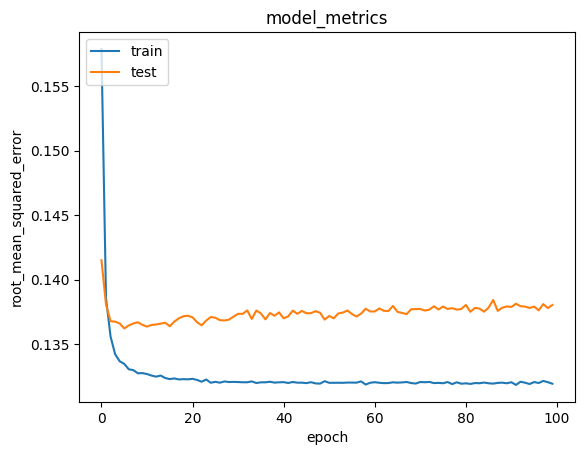

In [52]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Penjelasan:**
Proses training model cukup smooth dan model konvergen pada epochs 100. Dari proses ini, kita memperoleh nilai error RMSE akhir sebesar 0.1309 pada train dan 0.1380 pada validasi. Nilai tersebut cukup bagus untuk sistem rekomendasi.